## Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

---

## Load data

In [157]:
fish = pd.read_csv("fish_market.csv")

In [158]:
fish.head()

Unnamed: 0 Species  Weight  Length1  Length2  Length3   Height   Width  \
0           0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200   
1           1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056   
2           2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961   
3           3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555   
4           4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340   

   Female  
0       0  
1       1  
2       0  
3       0  
4       1

In [159]:
fish.columns

Index(['Unnamed: 0', 'Species', 'Weight', 'Length1', 'Length2', 'Length3',
       'Height', 'Width', 'Female'],
      dtype='object')

In [160]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  176 non-null    int64  
 1   Species     176 non-null    object 
 2   Weight      176 non-null    float64
 3   Length1     176 non-null    float64
 4   Length2     176 non-null    float64
 5   Length3     176 non-null    float64
 6   Height      176 non-null    float64
 7   Width       176 non-null    float64
 8   Female      176 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 11.8+ KB


In [161]:
fish.drop("Unnamed: 0", axis=1, inplace=True)

In [162]:
fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Female'],
      dtype='object')

---

## Encoding

In [163]:
fish.Female.unique()

array([0, 1], dtype=int64)

In [ ]:
#fish.Female = fish.Female.str.strip()

In [166]:
LabelEncoder_ = preprocessing.LabelEncoder()

In [168]:
fish.Female = LabelEncoder_.fit_transform(fish.Female)

In [169]:
fish.head()

Species  Weight  Length1  Length2  Length3   Height   Width  Female
0       46   242.0     23.2     25.4     30.0  11.5200  4.0200       0
1       53   290.0     24.0     26.3     31.2  12.4800  4.3056       1
2       57   340.0     23.9     26.5     31.1  12.3778  4.6961       0
3       59   363.0     26.3     29.0     33.5  12.7300  4.4555       0
4       61   430.0     26.5     29.0     34.0  12.4440  5.1340       1

---

## Divide data into Train and Test Sets

In [170]:
features = fish[['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
target = fish.Species

In [171]:
features.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0       46   242.0     23.2     25.4     30.0  11.5200  4.0200
1       53   290.0     24.0     26.3     31.2  12.4800  4.3056
2       57   340.0     23.9     26.5     31.1  12.3778  4.6961
3       59   363.0     26.3     29.0     33.5  12.7300  4.4555
4       61   430.0     26.5     29.0     34.0  12.4440  5.1340

In [172]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=18)

In [173]:
x_train.shape, y_train.shape

((158, 7), (158,))

In [174]:
x_test.shape, y_test.shape

((18, 7), (18,))

---

## Train model

In [175]:
model = tree.DecisionTreeClassifier()

In [176]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

---

## Test the model

In [177]:
y_predicted = model.predict(x_test)

In [178]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 0.4444444444444444


---

### Laboratory task - use DecisionTreeClassifier() model with different parameters. Try to understand how they influence the model accuracy.

[Text(203.9025, 212.004, 'X[1] <= 977.5\ngini = 0.986\nsamples = 158\nvalue = [1, 1, 2, 2, 2, 1, 2, 4, 2, 1, 2, 1, 2, 2\n1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 4\n1, 1, 3, 1, 2, 4, 3, 2, 1, 2, 2, 1, 1, 3\n1, 1, 2, 1, 1, 1, 1, 1, 2, 6, 1, 1, 2, 1\n1, 2, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1\n2, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 2, 1\n2, 1, 5, 1, 2, 1, 1, 2, 2, 2, 1]'),
 Text(86.74038461538461, 201.132, 'X[6] <= 1.28\ngini = 0.984\nsamples = 141\nvalue = [1, 1, 2, 2, 2, 1, 2, 4, 2, 1, 2, 1, 2, 2\n1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 4\n1, 1, 3, 1, 2, 4, 3, 2, 1, 2, 2, 1, 1, 3\n1, 1, 2, 1, 1, 1, 1, 1, 2, 6, 1, 1, 2, 1\n1, 2, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1\n2, 1, 2, 1, 4, 1, 1, 1, 1, 2, 1, 2, 2, 1\n2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(18.313846153846153, 190.26, 'X[0] <= 6.5\ngini = 0.827\nsamples = 14\nvalue = [0, 0, 2, 2, 2, 0, 0, 4, 2, 0, 1, 1, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0,

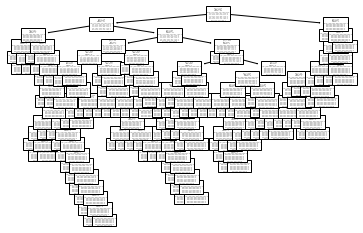

In [179]:
tree.plot_tree(model)

# HOME TASK 

## Load data

In [2]:
tData = pd.read_csv("Titanic.csv");

In [3]:
tData.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
tData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
tData.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [186]:
tData.drop("Unnamed: 0",axis = 1,inplace = True)

In [6]:
tData.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
tData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Encoding

In [8]:
tData.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [10]:
tData.Ticket = tData.Ticket.str.strip()

In [86]:
tData.Ticket.unique()

array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
       333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 329, 179,
        95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302, 186,
       507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522, 587,
       239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601, 189,
       553, 623, 248, 270, 557, 621, 204,  80, 347, 355, 473, 158, 432,
       304, 311, 280,  25, 637, 247, 676, 652, 297, 298, 341, 678, 548,
       428, 475, 607, 612, 117, 150, 384, 361, 417, 505, 245, 354, 296,
       254, 388, 469,   2, 193, 274, 491, 176, 666, 460, 585, 540, 219,
       463, 541, 196, 318, 380, 640, 537, 111, 552, 630,  55, 504, 592,
       203, 332, 668, 438, 118, 558, 405, 113, 147, 622,  36, 516, 538,
       573, 595, 418, 654, 258, 568, 470, 559, 323, 265, 423,  28, 576,
         5, 659,  90, 412, 488, 593, 169, 574, 629, 114, 271,  34, 459,
        11, 435, 386, 122, 227, 406, 604, 452, 494, 461, 160, 30

In [11]:
LabelEncoder_ = preprocessing.LabelEncoder()

In [12]:
tData.Ticket = LabelEncoder_.fit_transform(tData.Ticket)

In [13]:
tData.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch  Ticket     Fare Cabin Embarked  
0      0     523   7.2500   NaN        S  
1      0     596  71.2833   C85        C  
2      0     669   7.9250   NaN        S  
3      0      49  53.1000  C123        S  
4      0     472   8.0500   NaN        S

## Divide data into Train and Test Sets

In [95]:
features = tData[['PassengerId', 'Survived', 'Pclass', 'SibSp','Parch','Fare']]
target = tData.Pclass

In [96]:
features.head(1000)

PassengerId  Survived  Pclass  SibSp  Parch     Fare
0              1         0       3      1      0   7.2500
1              2         1       1      1      0  71.2833
2              3         1       3      0      0   7.9250
3              4         1       1      1      0  53.1000
4              5         0       3      0      0   8.0500
..           ...       ...     ...    ...    ...      ...
886          887         0       2      0      0  13.0000
887          888         1       1      0      0  30.0000
888          889         0       3      1      2  23.4500
889          890         1       1      0      0  30.0000
890          891         0       3      0      0   7.7500

[891 rows x 6 columns]

In [97]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=18)

In [98]:
x_train.shape, y_train.shape

((801, 6), (801,))

In [99]:
x_test.shape, y_test.shape

((90, 6), (90,))

## Train model

In [100]:
model = tree.DecisionTreeClassifier()

In [101]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

## Test the model

In [102]:
y_predicted = model.predict(x_test)

In [103]:
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predicted))

Accuracy of the model: 1.0


### Laboratory task - use DecisionTreeClassifier() model with different parameters. Try to understand how they influence the model accuracy.


[Text(200.88000000000002, 181.2, 'X[2] <= 2.5\ngini = 0.591\nsamples = 801\nvalue = [191, 164, 446]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 1.5\ngini = 0.497\nsamples = 355\nvalue = [191, 164, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 191\nvalue = [191, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 164\nvalue = [0, 164, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 446\nvalue = [0, 0, 446]')]

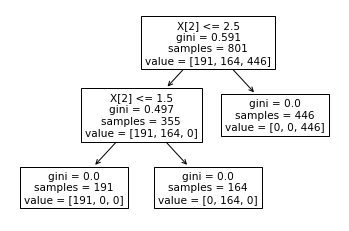

In [104]:
tree.plot_tree(model)

# Conclusion

Well, i guess that this lab work was clear enough about how to divide and choose data and also how train and test data.
Tree decision making scheme allow us to create imagination according to made choices.